

# Project: Investigate a Dataset (TMDb movie data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In these days movies are not just something to spend time on , they are more like something that feed our brains in understaing what might the world be in period of time.With data analysis this data set helps authors to find what genres,keywords and other properties that the audience like as long as the most benefical kind for them .Here are question to answer:


## Questions:
<br>•	Between Action,Adventure and Crime which genre has received the highest revenue?<br>
<br>•	Over time did the number of produced films changed?<br>


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#When I read a csv file the larage numbers became a problem (exponential )to deal with using pandas 
#this statment can solve the problem
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. 
df=pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

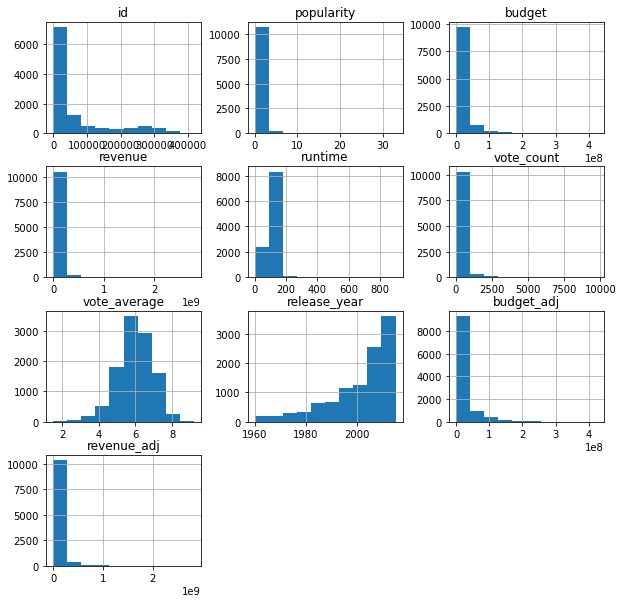

In [6]:
df.hist(figsize=(10,10));

### Some notices


<br> AS "df.describe()" and "df.hist(figsize=(10,10));" shows, there are columns that have a problem which are they:<br>

<br>budget,revenue,runtime,budget_adj and revenue_adj. will just keep the ones that will use it it our analysis<br>
<br> AS "df.info()" shows, there are columns  have a null values and we are going to deal with that:<br>


### Data Cleaning 
First thing we will split each of the columns that requried to be splited ,then each zero will be replaced with the mean of that columns ,lastly null rows will be dropped

In [7]:
#Here we will replace the mean of revenue to cells with 0
revenue_mean = df['revenue'].mean()
df['revenue'].replace(0, revenue_mean, inplace=True)
#confirming
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [8]:
#keeping the needed columns and drop the others
df =df.drop(columns ={'popularity','budget','runtime','budget_adj','revenue_adj','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','release_date','vote_count','vote_average'})
#confirming
df.head()

,id,revenue,genres,release_year
0,135397,1513528810.00,Action|Adventure|Science Fiction|Thriller,2015
1,76341,378436354.00,Action|Adventure|Science Fiction|Thriller,2015
2,262500,295238201.00,Adventure|Science Fiction|Thriller,2015
3,140607,2068178225.00,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,1506249360.00,Action|Crime|Thriller,2015


In [9]:
# checking  duplicate
sum(df.duplicated())

1

In [10]:
#removing  duplicate
df=df.drop_duplicates()
#confirming
sum(df.duplicated())

0

In [11]:
#confirming that each attribute has the right data type
df.dtypes

id                int64
revenue         float64
genres           object
release_year      int64
dtype: object

In [12]:
df.head()

,id,revenue,genres,release_year
0,135397,1513528810.00,Action|Adventure|Science Fiction|Thriller,2015
1,76341,378436354.00,Action|Adventure|Science Fiction|Thriller,2015
2,262500,295238201.00,Adventure|Science Fiction|Thriller,2015
3,140607,2068178225.00,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,1506249360.00,Action|Crime|Thriller,2015


<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1 
#### Between Action,Adventure and Crime which genre has received the highest revenue?

In [13]:
#take the row that contain Action in genres columns
df_Action = df.query(" 'Action' in genres" )


#take the row that contain Adventure in genres columns
df_Adventure = df.query(" 'Adventure' in genres" )



#take the row that contain Crime in genres columns
df_Crime = df.query(" 'Crime' in genres" )



In [14]:
#get the revenue for Action
df_Action.revenue.sum()

3804838291.3555126

In [15]:
#get the revenue for Adventure
df_Adventure.revenue.sum()

1312995007.14053

In [16]:
#get the revenue for Crime
df_Crime.revenue.sum()

119469959.3801767

In [17]:
#create a list of revenues got for the operations above
genre_revenue =[3804838291.3555126,1312995007.14053,119469959.3801767]

In [18]:
#create a list of needed genres
genres=["Action" ,"Adventure" ,"Crime"]

Text(0.5, 1.0, 'Toatl revenue for genres')

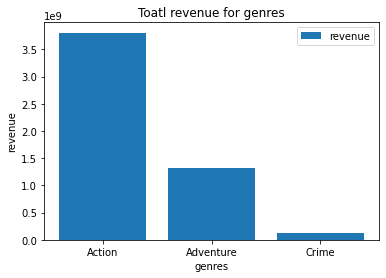

In [19]:
#ploting
plt.bar(genres, genre_revenue ,label='revenue');
plt.legend()
plt.xlabel("genres")
plt.ylabel("revenue")
plt.title("Toatl revenue for genres")


As shown Action movies make the highest revenue , where Crime movies create very small compared to ACtion and Adventure

###  Question 2  
#### Over time did the number of produced films changed?

In [20]:
df.head()

,id,revenue,genres,release_year
0,135397,1513528810.00,Action|Adventure|Science Fiction|Thriller,2015
1,76341,378436354.00,Action|Adventure|Science Fiction|Thriller,2015
2,262500,295238201.00,Adventure|Science Fiction|Thriller,2015
3,140607,2068178225.00,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,1506249360.00,Action|Crime|Thriller,2015


In [21]:

#copying the data
df_ny = df


#droping unused columns
df_ny=df_ny.drop(columns ={'revenue','genres'})

#renaming id to number_of_films as appropriate

df_ny=df_ny.rename(columns={"id": "number_of_films"})
#df_c=df_ny

#grouping by release_year to get the number of produced films
#Note that number_of_films before this line is unique since this column was id
df_ny=df_ny.groupby(['release_year']).count()


#cofirming
df_ny



,number_of_films
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


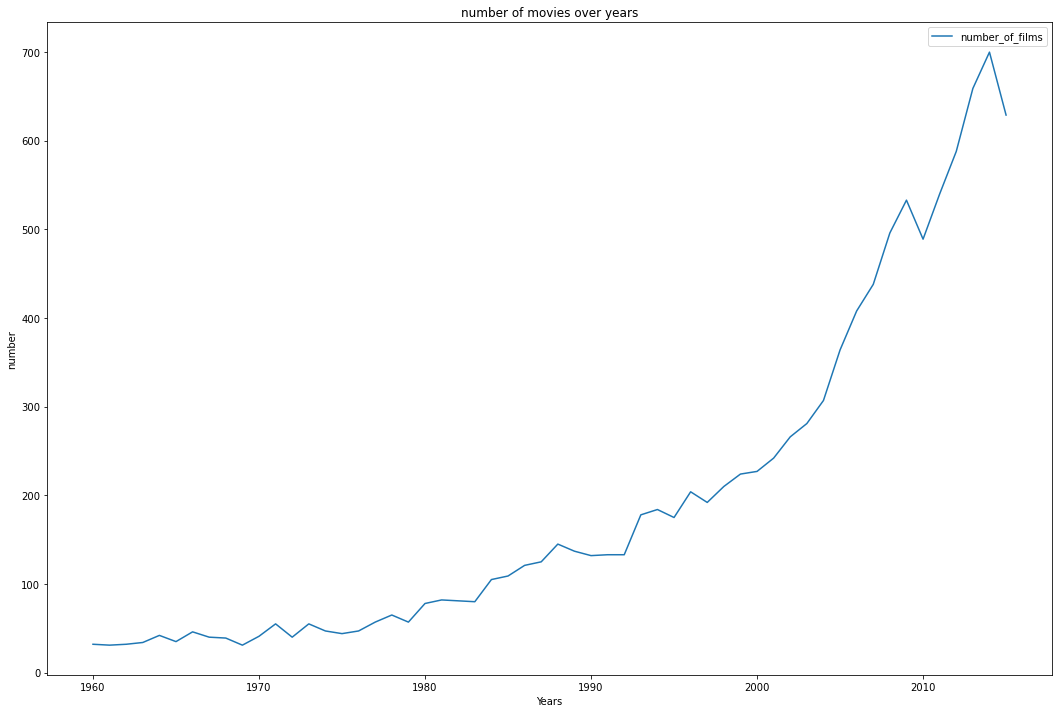

In [22]:
#ploting
df_ny.plot(  kind='line', figsize=(18,12), title="number of movies over years", label="number of movies", )
plt.xlabel('Years')
plt.ylabel('number');


From the line chart , clearly number of produced films has increased 

Text(0.5, 1.0, 'The relation between number of produced films and years')

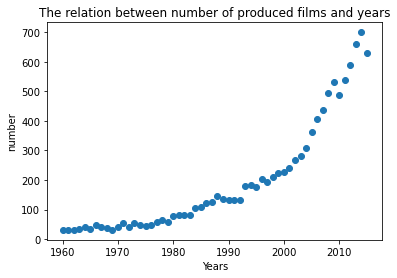

In [27]:
plt.scatter(x=df_ny.index , y=df_ny['number_of_films']);

plt.xlabel('Years')
plt.ylabel('number');
plt.title("The relation between number of produced films and years")

As the scatter plat shows the correlation between relase year and number of films produced that year is strong and positive

<a id='conclusions'></a>
## Conclusions

In conclusion, the first questions was "Between Action,Adventure and Crime which genre has received the highest revenue?" and the results was surprised a bitto me , since I thought that a lot of people like Crime movies including me,so thy make higher revenue , but was not.The second question was "Over time did the number of produced films changed?" and the answer is as I expected ,since now days there are much more moives advertisement.The other reason that made the results not surprised for me is the amount of new technologies that came up previous years.


## Limitation:
Discussing the limitations of TMDb dataset, there are many infomation have been modified such as rows contained 0 and null values that have been replaced by the average ,which would definitly affect the result.